In [1]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Se levanta el set de train generado

In [2]:
data_set = pd.read_csv("train_set_xgb.csv")
#X = data_set.loc[:, (data_set.columns != 'precio') & (data_set.columns != 'factor_pm')]
X = data_set.loc[:, (data_set.columns != 'precio')]
y = data_set.loc[:, ['precio']]

In [3]:
data_set.columns

Index(['id', 'precio', 'tipodepropiedad_1', 'tipodepropiedad_2',
       'tipodepropiedad_3', 'tipodepropiedad_4', 'tipodepropiedad_5',
       'tipodepropiedad_6', 'tipodepropiedad_7', 'tipodepropiedad_8',
       'tipodepropiedad_9', 'tipodepropiedad_10', 'tipodepropiedad_11',
       'tipodepropiedad_12', 'tipodepropiedad_13', 'tipodepropiedad_14',
       'tipodepropiedad_15', 'tipodepropiedad_16', 'tipodepropiedad_17',
       'tipodepropiedad_18', 'tipodepropiedad_19', 'tipodepropiedad_20',
       'tipodepropiedad_21', 'tipodepropiedad_22', 'tipodepropiedad_23',
       'tipodepropiedad_24', 'tipodepropiedad_25', 'provincia_1',
       'provincia_2', 'provincia_3', 'provincia_4', 'provincia_5',
       'provincia_6', 'provincia_7', 'provincia_8', 'provincia_9',
       'provincia_10', 'provincia_11', 'provincia_12', 'provincia_13',
       'provincia_14', 'provincia_15', 'provincia_16', 'provincia_17',
       'provincia_18', 'provincia_19', 'provincia_20', 'provincia_21',
       'provincia_

In [4]:
X.columns

Index(['id', 'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'tipodepropiedad_25', 'provincia_1', 'provincia_2', 'provincia_3',
       'provincia_4', 'provincia_5', 'provincia_6', 'provincia_7',
       'provincia_8', 'provincia_9', 'provincia_10', 'provincia_11',
       'provincia_12', 'provincia_13', 'provincia_14', 'provincia_15',
       'provincia_16', 'provincia_17', 'provincia_18', 'provincia_19',
       'provincia_20', 'provincia_21', 'provincia_22', 'provincia_2

In [5]:
y.columns

Index(['precio'], dtype='object')

# Se convierten los datos a DMatrix 

In [6]:
data_DMatrix = xgb.DMatrix(data = X, label = y)

# Se separa en train y en test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
len(X_train)

179965

In [9]:
len(X_test)

59989

# Se define y entrena el modelo con el set de train 

In [10]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 1,
                max_depth = 5, alpha = 10, n_estimators = 200)

In [11]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [12]:
pred_train = xg_reg.predict(X_train)

In [13]:
pred_test = xg_reg.predict(X_test)

# Se evaluan ambas predicciones

## Como metrica se utiliza RMSLE (cuanto mas cercano a 0, mejor)

In [14]:
# rmsle_train = np.sqrt(sklearn.metrics.mean_squared_log_error(y_train, pred_train))
# rmsle_test = np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, pred_test))
# print("RMSLE train: "+str(rmsle_train))
# print("RMSLE test: "+str(rmsle_train))


Esta comentado porque se ve que hay algun numero negativo. Entonces no se puede calcular el logaritmo

## Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [15]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 817.6029812179697
MAE test: 864.7043760732092


# Importancia de Features

<Figure size 3600x3600 with 0 Axes>

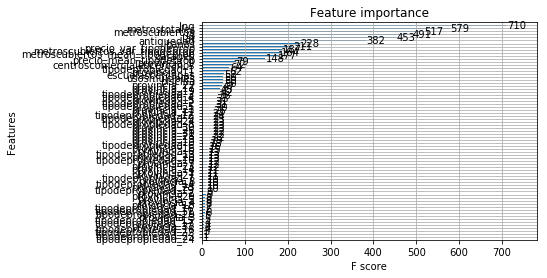

In [16]:
plt.figure(figsize = (50,50))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Se genera el archivo con las predicciones a subir a Kaggle

In [17]:
test_set = pd.read_csv("test_set_xgb.csv")

In [18]:
test_set.columns

Index(['id', 'tipodepropiedad_1', 'tipodepropiedad_2', 'tipodepropiedad_3',
       'tipodepropiedad_4', 'tipodepropiedad_5', 'tipodepropiedad_6',
       'tipodepropiedad_7', 'tipodepropiedad_8', 'tipodepropiedad_9',
       'tipodepropiedad_10', 'tipodepropiedad_11', 'tipodepropiedad_12',
       'tipodepropiedad_13', 'tipodepropiedad_14', 'tipodepropiedad_15',
       'tipodepropiedad_16', 'tipodepropiedad_17', 'tipodepropiedad_18',
       'tipodepropiedad_19', 'tipodepropiedad_20', 'tipodepropiedad_21',
       'tipodepropiedad_22', 'tipodepropiedad_23', 'tipodepropiedad_24',
       'tipodepropiedad_25', 'provincia_1', 'provincia_2', 'provincia_3',
       'provincia_4', 'provincia_5', 'provincia_6', 'provincia_7',
       'provincia_8', 'provincia_9', 'provincia_10', 'provincia_11',
       'provincia_12', 'provincia_13', 'provincia_14', 'provincia_15',
       'provincia_16', 'provincia_17', 'provincia_18', 'provincia_19',
       'provincia_20', 'provincia_21', 'provincia_22', 'provincia_2

In [19]:
pred_a_kaggle = xg_reg.predict(test_set)

In [20]:
pred_a_kaggle

array([7998366. , 3199266. , 1457349.6, ..., 1523293.6,  940035.2,
       3974728.8], dtype=float32)

In [21]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

,id,target
0,4941,7.998366e+06
1,51775,3.199266e+06
2,115253,1.457350e+06
3,299321,9.021618e+05
4,173570,8.522862e+05


Por alguna razon estan duplicados las filas. Debe haber un error en la generacion del csv. Habra que verificar

In [22]:
df_a_kaggle = df_a_kaggle.drop_duplicates("id")

In [23]:
kaggle_len = len(df_a_kaggle)
if(kaggle_len != 60000):
    raise Exception('Error: la cantidad de registros debe ser 60000!')

In [24]:
df_a_kaggle.to_csv("subir_a_kaggle", header = True, index = False)